In [0]:
#Importing all the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import os
from google.colab import drive
import cv2
import random
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import warnings
warnings.filterwarnings("ignore")


In [6]:
#Using google colab
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Using transfer learning on pre trained model from imagenet
from keras.applications import InceptionResNetV2
conv_base = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(150,150,3))

In [7]:
DIR='/content/gdrive/My Drive/Household Image/'   #directory in my drive
X=[] #train data
Y=[] #Its label
files=[i+str('/')+img_dir for i in os.listdir(DIR) for img_dir in os.listdir(DIR+f'{i}')]
random.shuffle(files)       #shuffling the data
for i in files:
    print(i)
    img = cv2.imread(DIR+i,1)
    img= cv2.resize(img, (150,150))   #resizing optimum size
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    X.append(img)
    if 'Status A' in i:
        Y.append(1)
    else:
        Y.append(0)

x=np.array(X)    #all the image data after pre processing
y=np.array(Y)     # labels for each house

Status B/20181125_122054.jpg
Status B/20181125_134002.jpg
Status A/20181125_133805.jpg
Status A/20181125_134504.jpg
Status A/20181125_123830.jpg
Status A/20181125_130936_001.jpg
Status A/20181125_131215.jpg
Status A/20181125_123528.jpg
Status B/20181125_124719.jpg
Status A/20181125_131008_001.jpg
Status B/20181125_121029.jpg
Status B/20181125_132209.jpg
Status A/20181125_133056.jpg
Status A/20181125_130909.jpg
Status B/20181125_122306.jpg
Status B/20181125_134418.jpg
Status A/20181125_133527.jpg
Status A/20181125_125214.jpg
Status B/20181125_132834.jpg
Status A/20181125_132008.jpg
Status B/No.1.jpg
Status B/20181125_132115.jpg
Status A/20181125_124946.jpg
Status B/20181125_121808.jpg
Status B/20181125_120749.jpg
Status A/20181125_123117.jpg
Status B/20181125_120059.jpg
Status B/20181125_134228.jpg
Status B/20181125_120846.jpg
Status A/20181125_131800.jpg
Status B/20181125_132701.jpg
Status A/20181125_133341.jpg
Status A/20181125_123430.jpg
Status A/20181125_122831.jpg
Status B/20181125

In [0]:
# VAlidation datasets obtain by randomizing the original data
X_val=[]
Y_val=[]
files=[i+str('/')+img_dir for i in os.listdir(DIR) for img_dir in os.listdir(DIR+f'{i}')]
random.shuffle(files)
for i in files:
    print(i)
    img = cv2.imread(DIR+i,1)
    img= cv2.resize(img, (150,150))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    X_val.append(img)
    if 'Status A' in i:
        Y_val.append(1)
    else:
        Y_val.append(0)

x_val=np.array(X_val)
y_val=np.array(Y_val)

In [0]:
#rescaling the data
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator = train_datagen.flow(x,y)

In [0]:
#rescaling the validation data
val_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
val_generator = val_datagen.flow(x_val, y_val,)

In [33]:
# training on pre trained model only the last fully connected layer
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(.5))              #dropout since less data leads to overfitting 
model.add(Dense(1, activation='sigmoid'))


conv_base.trainable = False
print('Number of trainable weights after freezing the conv base:', len(model.trainable_weights))

#Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

Number of trainable weights after freezing the conv base: 4


In [34]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=40,
                              epochs=25,
                              validation_data=val_generator,
                              validation_steps=40)

Epoch 1/25
40/40 [==============================] - 37s 923ms/step - loss: 1.3026 - acc: 0.7072 - val_loss: 1.2009 - val_acc: 0.7500
Epoch 2/25
40/40 [==============================] - 8s 202ms/step - loss: 0.2871 - acc: 0.8954 - val_loss: 1.8210 - val_acc: 0.7000
Epoch 3/25
40/40 [==============================] - 8s 199ms/step - loss: 0.2419 - acc: 0.9191 - val_loss: 0.6031 - val_acc: 0.8750
Epoch 4/25
40/40 [==============================] - 8s 200ms/step - loss: 0.3366 - acc: 0.8897 - val_loss: 0.7566 - val_acc: 0.8000
Epoch 5/25
40/40 [==============================] - 8s 196ms/step - loss: 0.1435 - acc: 0.9456 - val_loss: 1.1299 - val_acc: 0.8000
Epoch 6/25
40/40 [==============================] - 8s 204ms/step - loss: 0.1947 - acc: 0.9364 - val_loss: 0.9172 - val_acc: 0.8000
Epoch 7/25
40/40 [==============================] - 8s 201ms/step - loss: 0.2722 - acc: 0.9100 - val_loss: 1.1314 - val_acc: 0.7000
Epoch 8/25
40/40 [==============================] - 8s 196ms/step - loss: 0

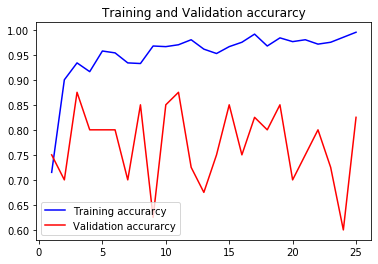

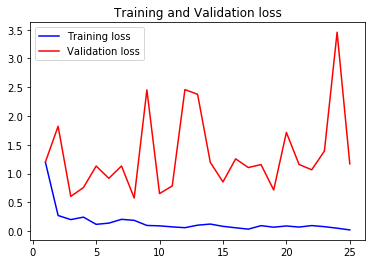

In [35]:
#get the details form the history object
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()




